In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import keras.backend as K
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


# Pretrained model

In [154]:
#Preprocessing
from PIL import Image
import glob
import os
from random import shuffle

paths=['test_directory_output/test/non_risky/*', 'test_directory_output/test/risky/*',
       'test_directory_output/train/non_risky/*', 'test_directory_output/train/risky/*']
for path in paths:
    files = glob.glob(path)
    for f in files:
        os.remove(f)

X = [X for X in range(1,60)]
shuffle(X)
numbers = []
numbers2 = []
for i in range(47):
    numbers.append(X[i])
for i in range(1,10):
    numbers2.append(X[i])

for number in numbers2:
    for infile in glob.glob("test_directory/non_risky/n" + str(number) + ".png"):
        file, ext = os.path.splitext(infile)
        im = Image.open(infile)
        name = file[25:]
        im.save("test_directory_output/test/non_risky/"+ name + ".png", "PNG")


numbers3 = [X for X in numbers if X not in numbers2]

for number in numbers3:
    for infile in glob.glob("test_directory/non_risky/n" + str(number) + ".png"):
        file, ext = os.path.splitext(infile)
        im = Image.open(infile)
        name = file[25:]
        im.save("test_directory_output/train/non_risky/"+ name + ".png", "PNG")

X = [X for X in range(1,48)]
shuffle(X)
numbers6 = []

for i in range(1,10):
    numbers6.append(X[i])
    
for number in numbers6:
    for infile in glob.glob("test_directory/risky/r" + str(number) + ".png"):
        file, ext = os.path.splitext(infile)
        im = Image.open(infile)
        name = file[21:]
        im.save("test_directory_output/test/risky/"+ name + ".png", "PNG")

numbers4 = [X for X in range(1,48)]        
numbers5 = [X for X in numbers4 if X not in numbers6]

for number in numbers5:
    for infile in glob.glob("test_directory/risky/r" + str(number) + ".png"):
        file, ext = os.path.splitext(infile)
        im = Image.open(infile)
        name = file[21:]
        im.save("test_directory_output/train/risky/"+ name + ".png", "PNG")

In [155]:
!python facenet/src/classifier.py TRAIN /home/artem/Documents/Python/Coursework3rd/test_directory_output/train /home/artem/Documents/Python/Coursework3rd/pretrained_model/20180402-114759.pb /home/artem/Documents/Python/Coursework3rd/pretrained_model/my_classifier.pkl --batch_size 1000

facenet/src/classifier.py:62: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(cls.image_paths)>0, 'There must be at least one image for each class in the dataset')
2019-03-25 20:36:59.803883: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2
Number of classes: 2
Number of images: 76
Loading feature extraction model
Model filename: /home/artem/Documents/Python/Coursework3rd/pretrained_model/20180402-114759.pb
Calculating features for images
Training classifier
Saved classifier model to file "/home/artem/Documents/Python/Coursework3rd/pretrained_model/my_classifier.pkl"


In [156]:
!python facenet/src/classifier.py CLASSIFY /home/artem/Documents/Python/Coursework3rd/test_directory_output/test/ /home/artem/Documents/Python/Coursework3rd/pretrained_model/20180402-114759.pb /home/artem/Documents/Python/Coursework3rd/pretrained_model/my_classifier.pkl --batch_size 1000

facenet/src/classifier.py:62: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(cls.image_paths)>0, 'There must be at least one image for each class in the dataset')
2019-03-25 20:37:33.842320: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2
Number of classes: 2
Number of images: 18
Loading feature extraction model
Model filename: /home/artem/Documents/Python/Coursework3rd/pretrained_model/20180402-114759.pb
Calculating features for images
Testing classifier
Loaded classifier model from file "/home/artem/Documents/Python/Coursework3rd/pretrained_model/my_classifier.pkl"
   0  risky  true_label - 0: 0.529
   1  non risky  true_label - 0: 0.500
   2  non risky  true_label - 0: 0.527
   3  non risky  true_label - 0: 0.511
   4  non risky  true_label - 0: 0.510
   5  non risky  true_label - 0: 0.500
   6  non risky  true_label - 0: 0.500
   7  non risky  tr

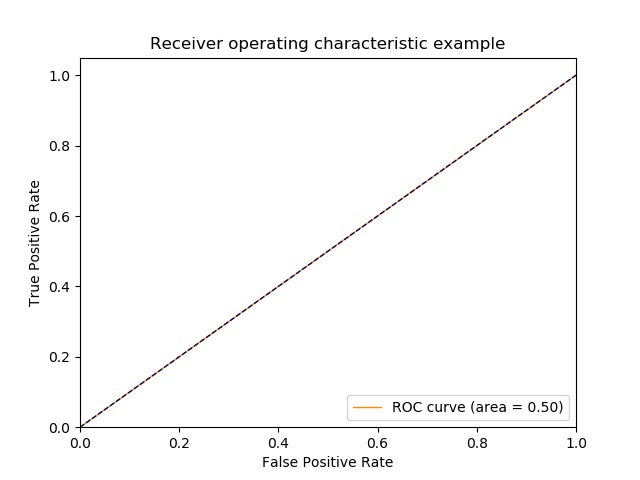

In [157]:
from IPython.display import Image
Image(filename='roc.jpeg',width=400, height=400)

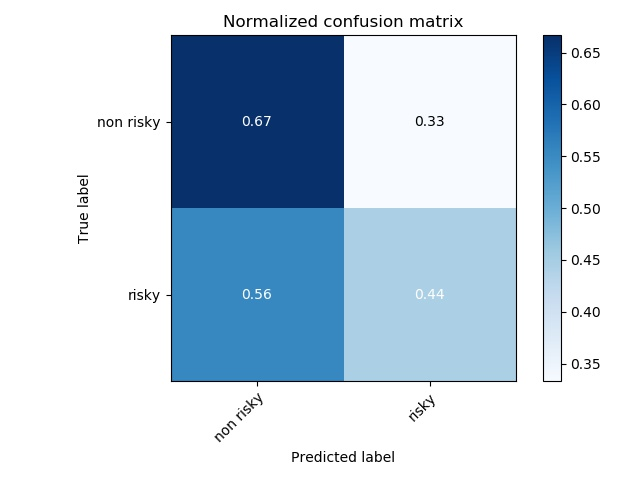

In [153]:
Image(filename='matrix.jpeg',width=400, height=400)

In [ ]:
from PIL import Image
import glob, os

def print_sprite(gender, a,b, Result,i,j): # a - columns b - rows
    #for infile in glob.glob("./GenderClassification/test/" + gender + "/*.jpg"):
    for infile in glob.glob("./real_classification/test/" + gender + "/*.png"):
        img = Image.open(infile)
        Result.paste(img, (182*i, 182*j))
        j = j + 1
        if j == b:
            j = 0
            i = i + 1
    return Result,i,j


i=0
j=0
imgResult = Image.new('RGB', (182*2, 182*6))
imgResult,i,j = print_sprite("risky", 2,6,imgResult,i,j)
print_sprite("non_risky",2,6,imgResult,i,j)
imgResult

https://github.com/davidsandberg/facenet/wiki/Train-a-classifier-on-own-images
    
https://github.com/sainimohit23/FaceNet-Real-Time-face-recognition

In [2]:
!python facenet/src/align_dataset_mtcnn.py /home/artem/Documents/Python/Coursework3rd/real_deta/ /home/artem/Documents/Python/Coursework3rd/real_data_aligned/ --image_size 182 --margin 44 --random_order --gpu_memory_fraction 0.25

^C
Traceback (most recent call last):
  File "facenet/src/align_dataset_mtcnn.py", line 34, in <module>
    import facenet
  File "/home/artem/Documents/Python/Coursework3rd/facenet/src/facenet.py", line 35, in <module>
    from sklearn.model_selection import KFold
  File "/home/artem/anaconda3/envs/Coursework/lib/python3.6/site-packages/sklearn/model_selection/__init__.py", line 19, in <module>
    from ._validation import cross_val_score
  File "/home/artem/anaconda3/envs/Coursework/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 31, in <module>
    from ..metrics.scorer import check_scoring, _check_multimetric_scoring
  File "/home/artem/anaconda3/envs/Coursework/lib/python3.6/site-packages/sklearn/metrics/__init__.py", line 7, in <module>
    from .ranking import auc
  File "/home/artem/anaconda3/envs/Coursework/lib/python3.6/site-packages/sklearn/metrics/ranking.py", line 27, in <module>
    from scipy.stats import rankdata
  File "/home/artem/anaconda3/e